<a href="https://colab.research.google.com/github/olyvias/python/blob/main/Pyhon%20-%20Tugas%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
cd /content/drive/MyDrive/Colab Notebooks


/content/drive/MyDrive/Colab Notebooks


In [9]:
ls

'PYTHON WEEK 10'/   Untitled0.ipynb


In [10]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [11]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("PYTHON WEEK 10")
data = []
labels = []

[INFO] loading images...


In [12]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 32x32 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
  image = Image.open(imagePath)
  image = np.array(image.resize((32, 32))) / 255.0
  data.append(image)

	# extract the class label from the file path and update the
	# labels list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [13]:
print(labels)

['highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway'

In [14]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [14]:
print(labels)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [15]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 32, 32, 3)
(237, 32, 32, 3)


In [16]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(32*32*3,)),
        Dense(32, activation="relu", name="layer1"),
        Dense(32, activation="relu", name="layer2"),
        Dense(32, activation="relu", name="layer3"),
        Dense(32, activation="relu", name="layer4"),
        Dense(32, activation="relu", name="layer5"),
        Dense(32, activation="relu", name="layer6"),
        Dense(3, activation = "softmax", name="layer7"),
    ]
)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
layer1 (Dense)               (None, 32)                98336     
_________________________________________________________________
layer2 (Dense)               (None, 32)                1056      
_________________________________________________________________
layer3 (Dense)               (None, 32)                1056      
_________________________________________________________________
layer4 (Dense)               (None, 32)                1056      
_________________________________________________________________
layer5 (Dense)               (None, 32)                1056      
_________________________________________________________________
layer6 (Dense)               (None, 32)               

In [18]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=35, batch_size=35,)

[INFO] training network...
Epoch 1/35
21/21 [==============================] - 0s 12ms/step - loss: 1.0450 - accuracy: 0.4205 - val_loss: 1.0087 - val_accuracy: 0.3924
Epoch 2/35
21/21 [==============================] - 0s 4ms/step - loss: 0.9167 - accuracy: 0.5457 - val_loss: 0.8688 - val_accuracy: 0.5865
Epoch 3/35
21/21 [==============================] - 0s 4ms/step - loss: 0.8147 - accuracy: 0.6343 - val_loss: 0.7792 - val_accuracy: 0.6667
Epoch 4/35
21/21 [==============================] - 0s 4ms/step - loss: 0.7265 - accuracy: 0.6667 - val_loss: 0.7834 - val_accuracy: 0.6540
Epoch 5/35
21/21 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.7145 - val_loss: 0.7792 - val_accuracy: 0.6751
Epoch 6/35
21/21 [==============================] - 0s 3ms/step - loss: 0.7128 - accuracy: 0.6737 - val_loss: 0.6320 - val_accuracy: 0.7637
Epoch 7/35
21/21 [==============================] - 0s 4ms/step - loss: 0.6151 - accuracy: 0.7300 - val_loss: 0.6352 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


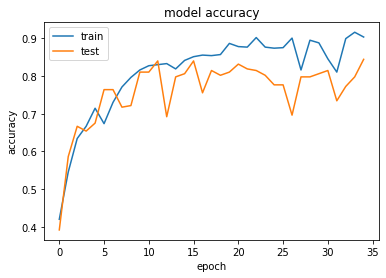

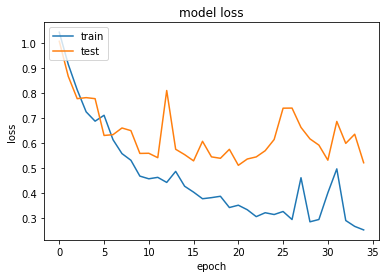

In [19]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.85      0.88      0.86        82
      forest       0.88      0.83      0.85        95
     highway       0.79      0.82      0.80        60

    accuracy                           0.84       237
   macro avg       0.84      0.84      0.84       237
weighted avg       0.85      0.84      0.84       237

